# 数据预处理

In [126]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.optimizers.legacy import Adam
from datetime import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [65]:
df = pd.read_csv('/Users/harvey/Desktop/quant2/FE/final_data_20240303.csv')

In [66]:
# 找到第一个空值出现的位置
first_null_position = df.isnull().any(axis=1).idxmin()

In [71]:
df = df[first_null_position:]

In [72]:
df = df_cleaned.set_index('Date')

In [73]:
df.isnull().values.any()

False

In [75]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM

# 假设 df 是您的 DataFrame

# 数据准备
features = df.drop(['close', 'time', 'open', 'high', 'low'], axis=1)
scaler_features = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler_features.fit_transform(features)

scaler_label = MinMaxScaler(feature_range=(0, 1))
scaled_close = scaler_label.fit_transform(df[['close']])
scaled_features = np.hstack((scaled_features, scaled_close))


time_step=96*3

future_step=12

from keras import backend as K




# 修改create_dataset以预测未来48个数据点
def create_dataset(data, time_step=120, future_step=48):
    X, Y = [], []
    for i in range(len(data) - time_step - future_step):
        a = data[i:(i + time_step), :-1]  # 特征
        X.append(a)
        Y.append(data[(i + time_step):(i + time_step + future_step), -1])  # 'close'列的未来48个数据点
    return np.array(X), np.array(Y)

# 应用修改后的时间步长
X, y = create_dataset(scaled_features, time_step=time_step, future_step=future_step)

# 划分训练集和测试集
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), kernel_initializer='glorot_uniform'),
    LSTM(50, return_sequences=False),
    Dense(future_step)
])

# 定义自定义损失函数
def custom_loss(y_true, y_pred):
    y_pred_last = y_pred[:, -1]
    y_true_last = y_true[:, -1]
    return K.mean(K.square(y_pred_last - y_true_last) + K.epsilon(), axis=-1)


optimizer = Adam(learning_rate=0.001, clipvalue=0.5)  # clipvalue是梯度裁剪的阈值
model.compile(optimizer=optimizer,loss=custom_loss)

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64, verbose=1)

# 预测和可视化
y_pred = model.predict(X_test)




Epoch 1/10
96/96 [==============================] - 15s 143ms/step - loss: 0.0121 - val_loss: 0.0030
Epoch 2/10
96/96 [==============================] - 13s 139ms/step - loss: 5.6436e-04 - val_loss: 0.0013
Epoch 3/10
96/96 [==============================] - 13s 138ms/step - loss: 4.5456e-04 - val_loss: 0.0011
Epoch 4/10
96/96 [==============================] - 13s 138ms/step - loss: 4.2747e-04 - val_loss: 8.4080e-04
Epoch 5/10
96/96 [==============================] - 13s 139ms/step - loss: 4.1299e-04 - val_loss: 4.9650e-04
Epoch 6/10
96/96 [==============================] - 13s 140ms/step - loss: 3.9669e-04 - val_loss: 4.6968e-04
Epoch 7/10
96/96 [==============================] - 14s 143ms/step - loss: 3.8783e-04 - val_loss: 4.5083e-04
Epoch 8/10
96/96 [==============================] - 14s 142ms/step - loss: 4.2172e-04 - val_loss: 5.9587e-04
Epoch 9/10
96/96 [==============================] - 13s 139ms/step - loss: 3.7650e-04 - val_loss: 4.5850e-04
Epoch 10/10
48/48 [================

In [79]:
y_pred

array([[-0.08996543, -0.11301502,  0.07939831, ..., -0.08759762,
        -0.27403173,  0.61978006],
       [-0.08996872, -0.10754851,  0.07861725, ..., -0.08687697,
        -0.2718506 ,  0.6207659 ],
       [-0.08998711, -0.10171127,  0.07620605, ..., -0.08770946,
        -0.26900256,  0.62177855],
       ...,
       [-0.2148271 , -0.14489678,  0.09277163, ..., -0.00102182,
        -0.43576565,  0.9431326 ],
       [-0.21416396, -0.1418839 ,  0.09084824, ..., -0.0021269 ,
        -0.43402573,  0.94283557],
       [-0.21547157, -0.14016935,  0.08871826, ..., -0.00193599,
        -0.4326604 ,  0.9457572 ]], dtype=float32)

In [78]:
y_test

array([[0.61975072, 0.62051774, 0.61764142, ..., 0.6147651 , 0.61323106,
        0.61361457],
       [0.62051774, 0.61764142, 0.61495686, ..., 0.61323106, 0.61361457,
        0.61725791],
       [0.61764142, 0.61495686, 0.61303931, ..., 0.61361457, 0.61725791,
        0.61668073],
       ...,
       [0.97430489, 0.97756472, 0.9767977 , ..., 0.97948226, 0.97929051,
        0.97948226],
       [0.97756472, 0.9767977 , 0.97583893, ..., 0.97929051, 0.97948226,
        0.97852349],
       [0.9767977 , 0.97583893, 0.97775647, ..., 0.97948226, 0.97852349,
        0.97756472]])

In [80]:
# 假设已经完成模型训练和预测步骤

# 逆标准化预测结果
y_pred_rescaled = scaler_label.inverse_transform(y_pred)
y_test_rescaled = scaler_label.inverse_transform(y_test)

# 由于预测结果对应于测试集，我们需要确定测试集开始的索引
test_start_index = len(df) - len(y_pred_rescaled)

# 创建一个新列以存储预测结果
# 注意：这里我们简化地只存储未来一个小时预测的最后一个值


predicted_close = np.full(shape=len(df), fill_value=np.nan)
predicted_close[test_start_index:] = y_pred_rescaled[:,-1]  # 只考虑每个序列预测的最后一个值

actual_close = np.full(shape=len(df), fill_value=np.nan)
# 为了对齐预测值，我们从测试集开始的索引处填充真实的关闭价格
# 注意，我们这里也是只考虑每个序列预测的最后一个值，因为这代表了一小时后的真实close值
actual_close[test_start_index:] = y_test_rescaled[:,-1]  # 只考虑每个序列的最后一个值

# 将真实的close值加入到df中
df['actual_close_in1h'] = actual_close

df['predicted_close_in1h'] = predicted_close


In [82]:
df_1h_magnify = df[['close','actual_close_in1h','predicted_close_in1h']]

In [84]:
df_1h_magnify['true_updown_in1h'] = df_1h_magnify['actual_close_in1h']/df_1h_magnify['close'] - 1
df_1h_magnify['predict_updown_in1h'] = df_1h_magnify['predicted_close_in1h']/df_1h_magnify['close'] - 1

/var/folders/t2/vmnkmyxs42b6h_fbsdjtsp0c0000gn/T/ipykernel_2476/2636791147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1h_magnify['true_updown_in1h'] = df_1h_magnify['actual_close_in1h']/df_1h_magnify['close'] - 1
/var/folders/t2/vmnkmyxs42b6h_fbsdjtsp0c0000gn/T/ipykernel_2476/2636791147.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1h_magnify['predict_updown_in1h'] = df_1h_magnify['predicted_close_in1h']/df_1h_magnify['close'] - 1


In [90]:
df_1h_magnify = df_1h_magnify.dropna(how='any')

df_1h_magnify['direction_same'] = (df_1h_magnify['true_updown_in1h'] * df_1h_magnify['predict_updown_in1h']) > 0

# 计算方向相同的次数
direction_same_count = df_1h_magnify['direction_same'].sum()

direction_same_count/len(df_1h_magnify)

0.5485342019543974

In [94]:
df_1h_magnify['true_updown_in1h'].quantile(0.25)

-0.00029383574733743423

In [96]:
df_1h_magnify['true_updown_in1h'].quantile(0.75)

0.0002091247577915567

In [99]:
df_1h_magnify

,close,actual_close_in1h,predicted_close_in1h,true_updown_in1h,predict_updown_in1h,direction_same,predict_change_rate
Date,,,,,,,
2024-02-20 19:20:00,426.5100,426.3200,426.641510,-0.000445,0.000308,False,0.000308
2024-02-20 19:25:00,426.4799,426.5100,426.692963,0.000071,0.000500,True,0.000500
2024-02-20 19:30:00,426.3400,426.4799,426.745758,0.000328,0.000952,True,0.000952
2024-02-20 19:35:00,426.3000,426.3400,426.704193,0.000094,0.000948,True,0.000948
2024-02-20 19:40:00,426.2800,426.3000,426.586609,0.000047,0.000719,True,0.000719
...,...,...,...,...,...,...,...
2024-03-01 19:35:00,445.3900,445.4000,443.571808,0.000022,-0.004082,False,-0.004082
2024-03-01 19:40:00,445.4000,445.3900,443.600861,-0.000022,-0.004039,True,-0.004039
2024-03-01 19:45:00,445.3500,445.4000,443.504364,0.000112,-0.004144,False,-0.004144


# 模型表现

In [186]:
#config

buy_threshold = 0.0002
sell_threshold = -0.0003

In [187]:
# 初始化资金和仓位
initial_capital = 1000
capital = initial_capital
position = 0  # 当前仓位，正数为持有，负数为卖空
trade_count = 0  # 交易次数
waiting_period = 0  # 等待期间的计数器
capital_list = []

for index, row in df_1h_magnify.iterrows():
    predict_change_rate = row['predict_updown_in1h']
    
    # 如果在等待期间
    if waiting_period > 0:
        waiting_period -= 1
        # 检查是否有相反的信号出现
        if (position > 0 and predict_change_rate < sell_threshold) or (position < 0 and predict_change_rate > buy_threshold):
            # 平仓
            capital += position * row['close']
            position = 0  # 清仓
            waiting_period = 0  # 重置等待期间
            
    # 检查是否买入条件
    if position == 0 and predict_change_rate > buy_threshold:
        # 买入
        position = 100 / row['close']
        capital -= position * row['close']
        waiting_period = 11  # 设置等待期间
        trade_count += 1
    elif position == 0 and predict_change_rate < sell_threshold:
        # 卖空
        position = -100 / row['close']
        capital += abs(position) * row['close']
        waiting_period = 11
        trade_count += 1
        
    # 如果不在等待期间，则可以平仓
    if waiting_period == 0 and position != 0:
        capital += position * row['close']
        position = 0  # 清仓

    

    # 检查是否是DataFrame的最后一行
    if index == df_1h_magnify.index[-1] and position != 0:
        # 如果是最后一期，则关闭所有仓位
        capital += position * row['close']
        position = 0  # 清仓
    capital_list.append(capital)

# 计算总回报
total_return = capital - initial_capital
df_1h_magnify['capital_list'] = capital_list

In [188]:
total_return

-3.067953303990521

In [189]:
df_1h_magnify['capital_list'][-1]/1000-1

-0.003067953303990567

In [190]:
df_1h_magnify['close'][-1]/df_1h_magnify['close'][0] -1

0.043586316850718676

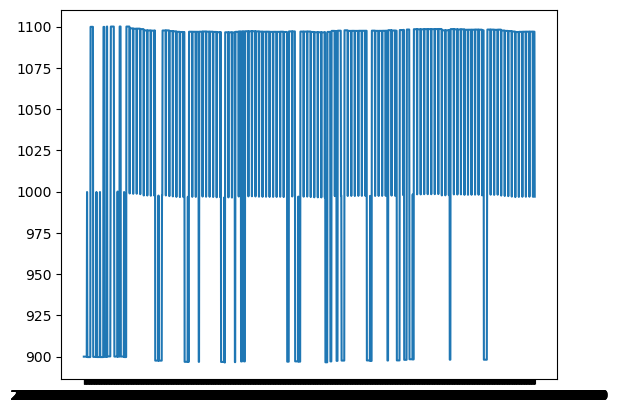

In [191]:
plt.plot(df_1h_magnify.index,df_1h_magnify['capital_list'])

In [166]:
df_1h_magnify

,close,actual_close_in1h,predicted_close_in1h,true_updown_in1h,predict_updown_in1h,direction_same,predict_change_rate,capital,capital_list,stock_returns,capital_returns,cumulative_return_stock,cumulative_return_strategy
Date,,,,,,,,,,,,,
2024-02-20 19:20:00,426.5100,426.3200,426.641510,-0.000445,0.000308,False,0.000308,900.000000,900.000000,0.000000,0.000000,0.000000,0.000000
2024-02-20 19:25:00,426.4799,426.5100,426.692963,0.000071,0.000500,True,0.000500,900.000000,900.000000,-0.000071,0.000000,-0.000071,0.000000
2024-02-20 19:30:00,426.3400,426.4799,426.745758,0.000328,0.000952,True,0.000952,900.000000,900.000000,-0.000399,0.000000,-0.000399,0.000000
2024-02-20 19:35:00,426.3000,426.3400,426.704193,0.000094,0.000948,True,0.000948,900.000000,900.000000,-0.000492,0.000000,-0.000492,0.000000
2024-02-20 19:40:00,426.2800,426.3000,426.586609,0.000047,0.000719,True,0.000719,900.000000,900.000000,-0.000539,0.000000,-0.000539,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-01 19:35:00,445.3900,445.4000,443.571808,0.000022,-0.004082,False,-0.004082,1096.625738,1096.625738,0.043590,2.145845,0.043590,2.145845
2024-03-01 19:40:00,445.4000,445.3900,443.600861,-0.000022,-0.004039,True,-0.004039,1096.625738,1096.625738,0.043613,2.145845,0.043613,2.145845
2024-03-01 19:45:00,445.3500,445.4000,443.504364,0.000112,-0.004144,False,-0.004144,1096.625738,1096.625738,0.043501,2.145845,0.043501,2.145845
